<i>This notebook is made by Haozhe TANG on 24, April for the final project of Deep Learning.</i>

# Import packages

In [1]:
#Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pathlib

#Tensorflow
import tensorflow as tf

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             confusion_matrix, 
                             classification_report)


# 1. Data Proprocessing

## 1.1 Data import and discovery

In [2]:
df = pd.read_csv('rice_dataset_simplified.csv')
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Rice_type
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
3,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati


**Null value check: this dataset does not have any null values.**

In [3]:
sum(df.isna().sum() > 0)

0

**Duplicate check: this dataset does not have any duplicates.**

In [4]:
sum(df.duplicated())

0

**Label outliers check: the target of this dataset is equally splitted**

In [5]:
#Label outliers check
df['Rice_type'].value_counts()

Basmati      1000
Arborio      1000
Ipsala       1000
Jasmine      1000
Karacadag    1000
Name: Rice_type, dtype: int64

**Features outliers check: did not find any outliers in feature columns**

In [6]:
#Features outliers check
if ((df.iloc[:, :-1] > 255).any == True):
    print('Outlier')

## 1.2 Image preview

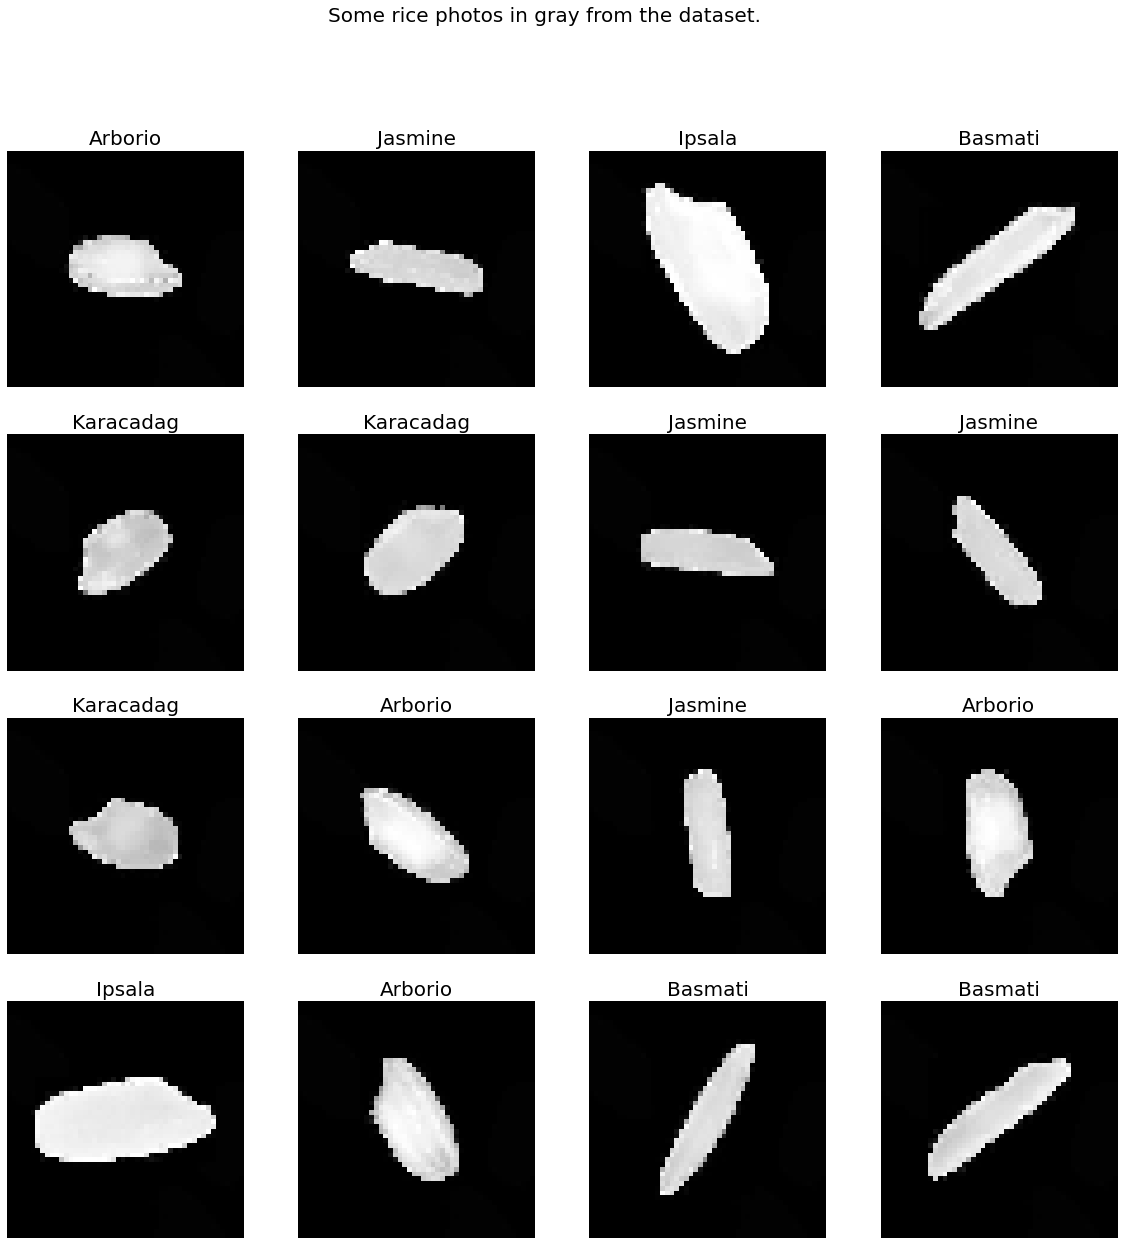

In [7]:
fig, axs = plt.subplots(4,4,figsize=(20,20))
fig.suptitle('Some rice photos in gray from the dataset.', fontsize=20)
samples = df.sample(n=16)
imgs = samples.iloc[:, :-1].to_numpy().astype(np.int64)
labels = samples.iloc[:, -1].to_numpy()

for img, label, ax in zip(imgs, labels, axs.flatten()):
    ax.imshow(img.reshape(50, 50), cmap='gray')
    ax.set_title(label, fontsize=20)
    ax.axis('off')
    
plt.show()

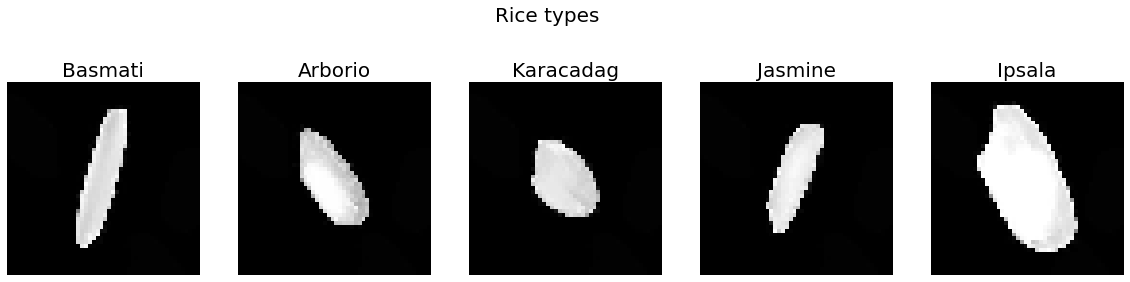

In [8]:
# Preview these five kinds of rices.
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Rice types', fontsize=20)
type_name = ['Basmati', 'Arborio', 'Karacadag', 'Jasmine', "Ipsala"]

for ax, label in zip(axs.flatten(), type_name):
    img = df[df['Rice_type'] == label].iloc[0, :-1].to_numpy().astype(np.int64)
    ax.imshow(img.reshape(50, 50), cmap='gray')
    ax.set_title(label, fontsize=20)
    ax.axis('off')

plt.show()

## 1.3 Preprocessing

### 1.3.1 Label Proprocessing

As this is a **classification question**, we decide to mapping the label of the dataset into numbers.

In [9]:
df.iloc[:, -1].value_counts()

Basmati      1000
Arborio      1000
Ipsala       1000
Jasmine      1000
Karacadag    1000
Name: Rice_type, dtype: int64

In [10]:
df.iloc[:, -1] = df.iloc[:, -1].map({
    'Basmati': 0,
    "Arborio": 1,
    "Karacadag": 2,
    "Jasmine": 3,
    "Ipsala": 4
})
df.head()
#Or we could use sklearn.preprocessing.LabelEncoder()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Rice_type
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0


### 1.3.2 Features preprocessing

As all features are pixels in the **50x50** images and this dataset does not has any outliers - we decide to divide all values by 255 to do the **normalization process** to all pixel values.

In [11]:
df.iloc[:, :-1] = df.iloc[:, :-1] / 255
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Rice_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0


# 2. Dataset splitting

In [12]:
#Split features and label
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In this case, the dataset will be splitted into three parts and the ratio of each part is as follows:
<li>70% for training set;</li>
<li>10% for validation set;</li>
<li>20% for testing set.</li>

In [13]:
#Split dataset into training, validation and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size= 0.7,
                                                    stratify=y,
                                                   random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test,
                                               y_test,
                                               train_size= 1/3,
                                               stratify=y_test,
                                               random_state=42)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3500, 2500)
(500, 2500)
(1000, 2500)


# 3. MLP model

After analysing the structure of the dataset, we found that this task **is not a binary classification task** - so that we can not choose **"sigmoid"** as the activation function. Instead, we choose **"softmax"** as the activation function.

## 3.1 Basic model

For the first trial, we will use the following structure as the basic model of MLP:
<li><font color='blue'>One dense layer with 8 units and the activation function is 'relu'</li>
<li><font color='blue'>Another dense layer with 8 units and the activation function is 'relu'</li>
<li><font color='blue'>Final desnse layer (Output) with 5 units(5 catogories for label) and the activation function is 'softmax'</li>

### 3.1.1 Model building

In [15]:
tf.keras.backend.clear_session()

model_mlp = tf.keras.Sequential()

model_mlp.add(tf.keras.layers.Input(shape=(2500)))
model_mlp.add(tf.keras.layers.Dense(units=8, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=8, activation='relu'))              
model_mlp.add(tf.keras.layers.Dense(units=5, activation='softmax'))

2023-04-30 12:03:13.203285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 20008     
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 20,125
Trainable params: 20,125
Non-trainable params: 0
_________________________________________________________________


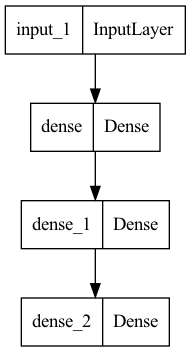

In [17]:
tf.keras.utils.plot_model(model_mlp)

### 3.1.2 Model compile and training

In [18]:
model_mlp.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['accuracy'])

In [19]:
model_mlp_his = model_mlp.fit(X_train,
                             y_train,
                             epochs=30,
                             batch_size=16,
                             validation_data=(X_val, y_val)
                             )

Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.9615 - accuracy: 0.5323 - val_loss: 0.7457 - val_accuracy: 0.6400
Epoch 2/30
219/219 [==============================] - 0s 1ms/step - loss: 0.6529 - accuracy: 0.7189 - val_loss: 0.5212 - val_accuracy: 0.8180
Epoch 3/30
219/219 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8191 - val_loss: 0.4215 - val_accuracy: 0.8360
Epoch 4/30
219/219 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8366 - val_loss: 0.3552 - val_accuracy: 0.8640
Epoch 5/30
219/219 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8783 - val_loss: 0.2815 - val_accuracy: 0.9080
Epoch 6/30
219/219 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8829 - val_loss: 0.3290 - val_accuracy: 0.8760
Epoch 7/30
219/219 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8786 - val_loss: 0.2883 - val_accuracy: 0.9140
Epoch 

In [20]:
model_mlp_his.history

{'loss': [0.9614990949630737,
  0.652941882610321,
  0.45028313994407654,
  0.39128151535987854,
  0.334349125623703,
  0.3189660310745239,
  0.3222927153110504,
  0.28277307748794556,
  0.26735275983810425,
  0.24885791540145874,
  0.25057876110076904,
  0.2448621690273285,
  0.23805244266986847,
  0.23799346387386322,
  0.24302539229393005,
  0.22423024475574493,
  0.22746621072292328,
  0.22954913973808289,
  0.22171111404895782,
  0.22416268289089203,
  0.20723754167556763,
  0.2208826243877411,
  0.1872144639492035,
  0.2194809764623642,
  0.21134036779403687,
  0.20042525231838226,
  0.19509243965148926,
  0.18695345520973206,
  0.20986612141132355,
  0.19401150941848755],
 'accuracy': [0.5322856903076172,
  0.7188571691513062,
  0.8191428780555725,
  0.836571455001831,
  0.8782857060432434,
  0.8828571438789368,
  0.8785714507102966,
  0.9020000100135803,
  0.9057142734527588,
  0.9174285531044006,
  0.9160000085830688,
  0.9179999828338623,
  0.921999990940094,
  0.920571446418

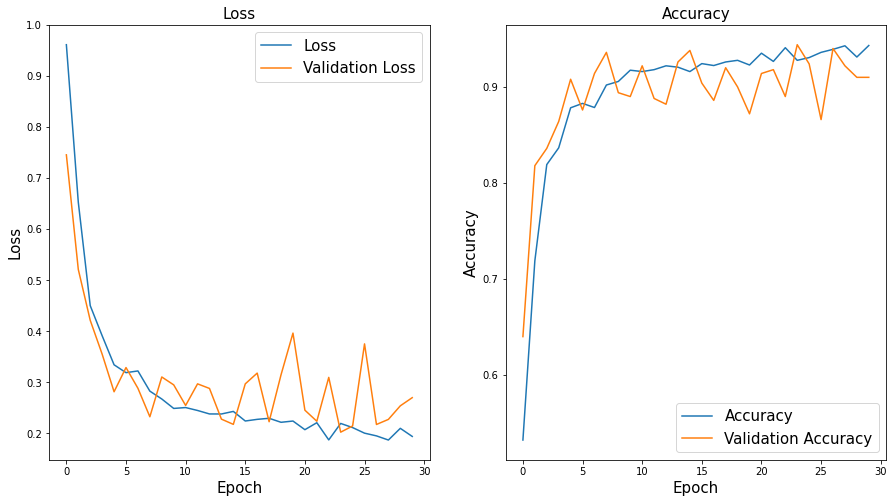

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(model_mlp_his.history['loss'], label='Loss')
ax[0].plot(model_mlp_his.history['val_loss'], label='Validation Loss')
ax[0].set_xlabel('Epoch', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].set_title('Loss', fontsize=15)
ax[0].legend(loc='best', fontsize=15)

ax[1].plot(model_mlp_his.history['accuracy'], label='Accuracy')
ax[1].plot(model_mlp_his.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_xlabel('Epoch', fontsize=15)
ax[1].set_ylabel('Accuracy', fontsize=15)
ax[1].set_title('Accuracy', fontsize=15)
ax[1].legend(loc='best', fontsize=15)

plt.show()

As we can see from the learning curve, this model fits well on the training set, but not very stable for validation set - so we need to adjust the structure and compling method.

### 3.1.3 Model evaluation and prediction

In [22]:
model_mlp.evaluate(X_test, y_test)

32/32 [==============================] - 0s 855us/step - loss: 0.3569 - accuracy: 0.8790


[0.3569144308567047, 0.8790000081062317]

In [23]:
y_mlp_pred = model_mlp.predict(X_test)
y_mlp_pred = np.argmax(y_mlp_pred, axis=1)

32/32 [==============================] - 0s 729us/step


In [24]:
report_mlp = classification_report(y_test, y_mlp_pred, target_names=type_name)
print(report_mlp)

              precision    recall  f1-score   support

     Basmati       0.98      0.96      0.97       200
     Arborio       0.91      0.67      0.77       200
   Karacadag       0.80      0.96      0.87       200
     Jasmine       0.75      0.81      0.78       200
      Ipsala       0.99      0.99      0.99       200

    accuracy                           0.88      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



In the next part, we will improve the model by adding more layers and control the number of units in each hidden layer.

## 3.2 Improved model

For improved model, we made the structure more complicated - both with more(or more proper number of) layers and with more units for each layer:
<li><font color='blue'>One dense layer with 64 units and the activation function is 'relu'</li>
<li><font color='blue'>Second dense layer with 32 units and the activation function is 'relu'</li>
<li><font color='blue'>Third dense layer with 16 units and the activation function is 'relu'</li>
<li><font color='blue'>Final desnse layer (Output) with 5 units(5 catogories for label) and the activation function is 'softmax'</li>

### 3.2.1 Model  building

In [25]:
tf.keras.backend.clear_session()

model_mlp1 = tf.keras.Sequential()

model_mlp1.add(tf.keras.layers.Input(shape=(2500)))

model_mlp1.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_mlp1.add(tf.keras.layers.Dense(units=32, activation='relu'))
model_mlp1.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_mlp1.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [26]:
model_mlp1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                160064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 162,757
Trainable params: 162,757
Non-trainable params: 0
_________________________________________________________________


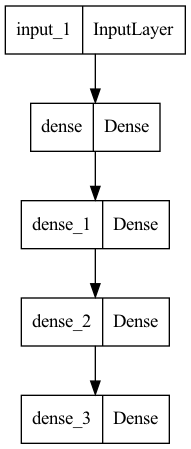

In [27]:
tf.keras.utils.plot_model(model_mlp1)

### 3.2.2 Model compile and training

In [28]:
model_mlp1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0, nesterov=False),
             metrics=['accuracy'])

In [29]:
model_mlp_his1 = model_mlp1.fit(X_train, 
               y_train,
              epochs=20,
              batch_size=32,
              validation_data=(X_val, y_val))

Epoch 1/20
110/110 [==============================] - 1s 3ms/step - loss: 1.3840 - accuracy: 0.4560 - val_loss: 1.0701 - val_accuracy: 0.7940
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 0.7580 - accuracy: 0.8569 - val_loss: 0.4969 - val_accuracy: 0.9320
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.9460 - val_loss: 0.2617 - val_accuracy: 0.9320
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9620 - val_loss: 0.1573 - val_accuracy: 0.9740
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9717 - val_loss: 0.1407 - val_accuracy: 0.9620
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9771 - val_loss: 0.1060 - val_accuracy: 0.9700
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9791 - val_loss: 0.0950 - val_accuracy: 0.9740
Epoch 

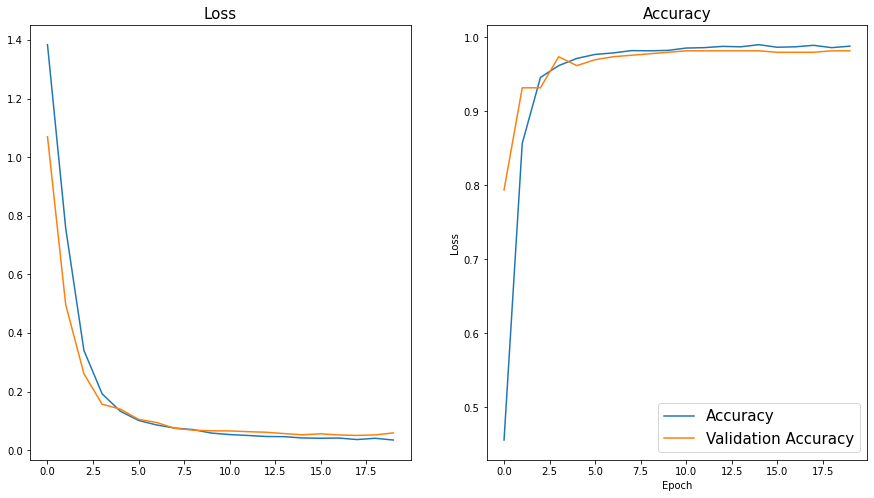

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(model_mlp_his1.history['loss'], label='Loss')
ax[0].plot(model_mlp_his1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax[0].set_title('Loss', fontsize=15)

ax[1].plot(model_mlp_his1.history['accuracy'], label='Accuracy')
ax[1].plot(model_mlp_his1.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy', fontsize=15)

plt.legend(loc='best', fontsize=15)

We can see that both the loss and accuracy learning curve perfomed pretty well: **this model fit perfect both on training and validation datasets.** and it does not reveal any of overfitting or underfitting.

### 3.2.3 Model evaluation and prediction

In [31]:
# Evalute model on test dataset
model_mlp1.evaluate(X_test, y_test)

32/32 [==============================] - 0s 982us/step - loss: 0.0555 - accuracy: 0.9830


[0.05551386624574661, 0.9829999804496765]

In [32]:
y_mlp_pred1 = model_mlp1.predict(X_test)
predictied_label1 = np.argmax(y_mlp_pred1, axis=1)

32/32 [==============================] - 0s 871us/step


In [33]:
report1 = classification_report(y_test, predictied_label1, target_names=type_name)
print(report1)

              precision    recall  f1-score   support

     Basmati       1.00      0.99      1.00       200
     Arborio       0.96      0.96      0.96       200
   Karacadag       0.98      0.95      0.97       200
     Jasmine       0.98      1.00      0.99       200
      Ipsala       1.00      1.00      1.00       200

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



We can find that this model performs better than the basic model.

# 4. CNN model

Now we do some trials with different CNN structures to test and enhance its performance on the dataset.

## 4.1 Basic model

### 4.1.1 Dataset shapping

In the CNN model, we have to make the dataset (pixels on images) from **1D (2500,)** to **2D (50, 50)**, so we need to do a reshape to the features first.

In [34]:
X_train_CNN = X_train.to_numpy().reshape(-1, 50, 50, 1)
X_val_CNN = X_val.to_numpy().reshape(-1, 50, 50, 1)
X_test_CNN = X_test.to_numpy().reshape(-1, 50, 50, 1)

In [35]:
X_train_CNN.shape

(3500, 50, 50, 1)

### 4.1.2 Model building

*   **<font color='blue'>One convolutional layer with 32 filters, a kernel size of 3x3 and a relu activation function**
*   **<font color='blue'>Followed by one max pooling layer with a pool size of 2x2**
*   **<font color='blue'>Followed by one flattening layer**
*   **<font color='blue'>Followed by one dense layer with 32 neurons and a relu activation function**
*   **<font color='blue'>Followed by a final dense layer for a classification task.**

In [36]:
tf.keras.backend.clear_session()

input_layer = tf.keras.Input(shape=(50, 50, 1))

conv = tf.keras.layers.Conv2D(filters=32,
                              kernel_size=(3, 3),
                              activation='relu')(input_layer)

maxpool = tf.keras.layers.MaxPool2D(2)(conv)

flat = tf.keras.layers.Flatten()(maxpool)

dense1 = tf.keras.layers.Dense(units=32,
                             activation='relu')(flat)

output = tf.keras.layers.Dense(units=5,
                              activation='softmax')(dense1)

In [37]:
model = tf.keras.Model(inputs=input_layer, outputs=output)

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 32)                589856    
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                             

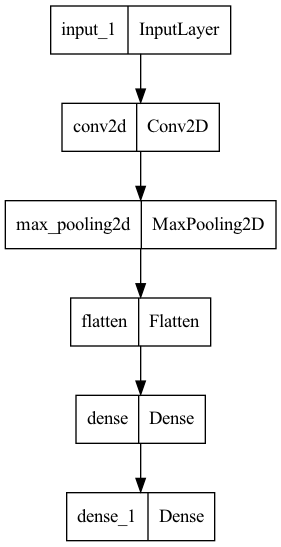

In [39]:
tf.keras.utils.plot_model(model)

### 4.1.3 Model compile and training

In [40]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [41]:
train_his = model.fit(X_train_CNN, 
                      y_train,
                     epochs=20,
                     batch_size=64,
                     validation_data=(X_val_CNN, y_val))

Epoch 1/20
55/55 [==============================] - 2s 29ms/step - loss: 0.5492 - accuracy: 0.8163 - val_loss: 0.1479 - val_accuracy: 0.9600
Epoch 2/20
55/55 [==============================] - 2s 30ms/step - loss: 0.1036 - accuracy: 0.9660 - val_loss: 0.0877 - val_accuracy: 0.9720
Epoch 3/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0748 - accuracy: 0.9749 - val_loss: 0.1016 - val_accuracy: 0.9720
Epoch 4/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0606 - accuracy: 0.9783 - val_loss: 0.0661 - val_accuracy: 0.9820
Epoch 5/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0466 - accuracy: 0.9863 - val_loss: 0.0767 - val_accuracy: 0.9800
Epoch 6/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0500 - accuracy: 0.9820 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 7/20
55/55 [==============================] - 2s 33ms/step - loss: 0.0408 - accuracy: 0.9851 - val_loss: 0.0826 - val_accuracy: 0.9760
Epoch 8/20
55

In [42]:
train_his.history

{'loss': [0.5491942763328552,
  0.1036093458533287,
  0.07482834905385971,
  0.06064579263329506,
  0.04658132046461105,
  0.05004620924592018,
  0.04080319032073021,
  0.046763818711042404,
  0.032960690557956696,
  0.0397995226085186,
  0.03499598056077957,
  0.06950325518846512,
  0.03571208938956261,
  0.026608038693666458,
  0.030579082667827606,
  0.023650560528039932,
  0.032716166228055954,
  0.025159180164337158,
  0.018511665984988213,
  0.021383540704846382],
 'accuracy': [0.8162857294082642,
  0.9660000205039978,
  0.9748571515083313,
  0.9782857298851013,
  0.9862856864929199,
  0.9819999933242798,
  0.9851428866386414,
  0.9825714230537415,
  0.9879999756813049,
  0.9837142825126648,
  0.9871428608894348,
  0.9748571515083313,
  0.9854285717010498,
  0.991428554058075,
  0.9894285798072815,
  0.9911428689956665,
  0.9874285459518433,
  0.9902856945991516,
  0.9934285879135132,
  0.9922857284545898],
 'val_loss': [0.14788952469825745,
  0.08771239221096039,
  0.10156574845

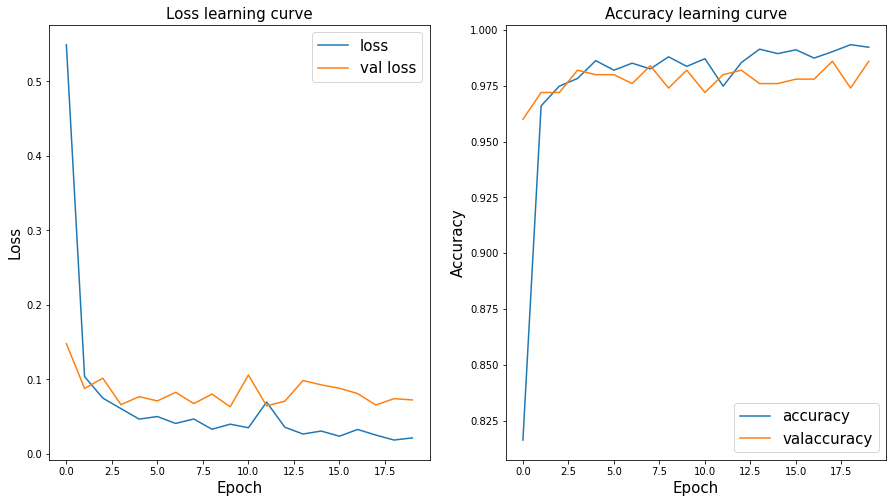

In [43]:
# Learning curves display
fig, ax = plt.subplots(1, 2, figsize=(15,8))

ax[0].plot(train_his.history['loss'], label='loss')
ax[0].plot(train_his.history['val_loss'], label='val loss')
ax[0].set_title('Loss learning curve', fontsize=15)
ax[0].set_xlabel('Epoch', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].legend(loc='best', fontsize=15)

ax[1].plot(train_his.history['accuracy'], label='accuracy')
ax[1].plot(train_his.history['val_accuracy'], label='valaccuracy')
ax[1].set_title('Accuracy learning curve', fontsize=15)
ax[1].set_xlabel('Epoch', fontsize=15)
ax[1].set_ylabel('Accuracy', fontsize=15)
ax[1].legend(loc='best', fontsize=15)

plt.show()

According to the model training history and learning curve, we can find that:
<li>The model performed perfectly on both training and validation datasets;</li>
<li>The model fits well on both datasets and it did not appear to overfitting or underfitting;</li>
<li>The accuracy of training set keeps raising continiously while for validation dataset, it declined a little after 4 epoches and keeps fluctuating afterwards.</li>

### 4.1.4 Model evaluation and prediction

In [44]:
# Evalute model on test dataset
model.evaluate(X_test_CNN, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.9790


[0.05894101411104202, 0.9789999723434448]

In [45]:
y_pred1 = model.predict(X_test_CNN)

32/32 [==============================] - 0s 4ms/step


In [46]:
predictied_label = np.argmax(y_pred1, axis=1)

In [47]:
report1 = classification_report(y_test, predictied_label, target_names=type_name)
print(report1)

              precision    recall  f1-score   support

     Basmati       0.99      1.00      0.99       200
     Arborio       0.97      0.94      0.95       200
   Karacadag       0.95      0.97      0.96       200
     Jasmine       0.99      0.99      0.99       200
      Ipsala       1.00      0.99      1.00       200

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



It shows that classification for **"Arborio"** and **"Karacadag"** these two kinds of rice has not very good performance. So we decide to complex the structure and try to change some parameters.

## 4.2 Improved model

### 4.2.1 Model building

*   **<font color='blue'>One convolutional layer with 32 filters, a kernel size of 3x3 and a relu activation function**
*   **<font color='blue'>Followed by one max pooling layer with a pool size of 2x2 and strides of 2**
*   **<font color='blue'>Followed by one flattening layer**
*   **<font color='blue'>Followed by one dense layer with 45 neurons and a relu activation function**
*   **<font color='blue'>Followed by one dense layer with 15 neurons and a relu activation function**
*   **<font color='blue'>Followed by one dropout layer with the rate of 0.1 and seed of 100.**
*   **<font color='blue'>Followed by a final dense layer for a classification task.**

In [59]:
tf.keras.backend.clear_session()
conv2 = tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu', padding='valid')(input_layer)

maxpool2 = tf.keras.layers.MaxPool2D(pool_size=2,
                                    strides=2)(conv2)

flatten2 = tf.keras.layers.Flatten()(maxpool2)

dense1 = tf.keras.layers.Dense(units=30,
                              activation='relu')(flatten2)

dense2 = tf.keras.layers.Dense(units=15,
                              activation='relu')(dense1)

dropout = tf.keras.layers.Dropout(rate=0.1, seed=100)(dense2)


output = tf.keras.layers.Dense(units=5,
                              activation='softmax')(dropout)

In [60]:
model2 = tf.keras.Model(inputs=input_layer, outputs=output)

In [61]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 30)                552990    
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                             

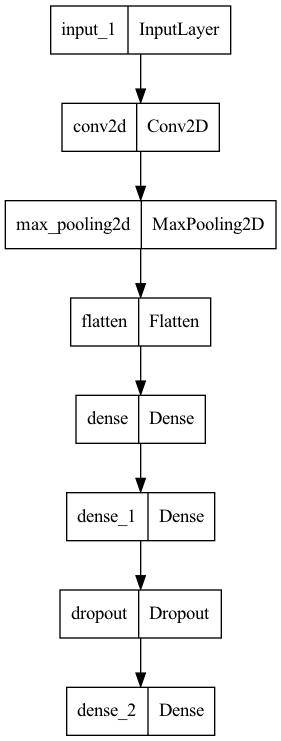

In [62]:
tf.keras.utils.plot_model(model2)

### 4.2.2 Model compile and training

In this case, we use **EarlyStopping** in our model for stopping the running after 10 times.

In [63]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [64]:
model2_his = model2.fit(X_train_CNN,
          y_train,
          epochs=20,
          shuffle=True,
          validation_data=(X_val_CNN, y_val),
          batch_size=64,
          callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10))

Epoch 1/20
55/55 [==============================] - 2s 33ms/step - loss: 0.6706 - accuracy: 0.7446 - val_loss: 0.1230 - val_accuracy: 0.9800
Epoch 2/20
55/55 [==============================] - 2s 31ms/step - loss: 0.1583 - accuracy: 0.9460 - val_loss: 0.0820 - val_accuracy: 0.9740
Epoch 3/20
55/55 [==============================] - 2s 30ms/step - loss: 0.1081 - accuracy: 0.9606 - val_loss: 0.0644 - val_accuracy: 0.9780
Epoch 4/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0936 - accuracy: 0.9646 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 5/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0832 - accuracy: 0.9683 - val_loss: 0.0717 - val_accuracy: 0.9780
Epoch 6/20
55/55 [==============================] - 2s 30ms/step - loss: 0.0838 - accuracy: 0.9717 - val_loss: 0.0562 - val_accuracy: 0.9800
Epoch 7/20
55/55 [==============================] - 2s 31ms/step - loss: 0.0835 - accuracy: 0.9723 - val_loss: 0.0605 - val_accuracy: 0.9760
Epoch 8/20
55

In [65]:
model2_his = model2_his.history
model2_his

{'loss': [0.6705729365348816,
  0.15831443667411804,
  0.10812516510486603,
  0.09355449676513672,
  0.08317960053682327,
  0.08377212285995483,
  0.08352424949407578,
  0.07377427816390991,
  0.05556735768914223,
  0.04804001376032829,
  0.045291610062122345,
  0.04953629523515701,
  0.03797294571995735,
  0.03614506870508194,
  0.04468192532658577,
  0.0413760170340538,
  0.03480229154229164,
  0.0281387809664011,
  0.03982653468847275,
  0.029848868027329445],
 'accuracy': [0.7445714473724365,
  0.9459999799728394,
  0.9605714082717896,
  0.9645714163780212,
  0.9682857394218445,
  0.9717142581939697,
  0.9722856879234314,
  0.9705714583396912,
  0.9791428446769714,
  0.9817143082618713,
  0.982285737991333,
  0.9797142744064331,
  0.9862856864929199,
  0.9868571162223816,
  0.980571448802948,
  0.9848571419715881,
  0.9877142906188965,
  0.9902856945991516,
  0.9851428866386414,
  0.9885714054107666],
 'val_loss': [0.12303462624549866,
  0.08201675117015839,
  0.06439972668886185,


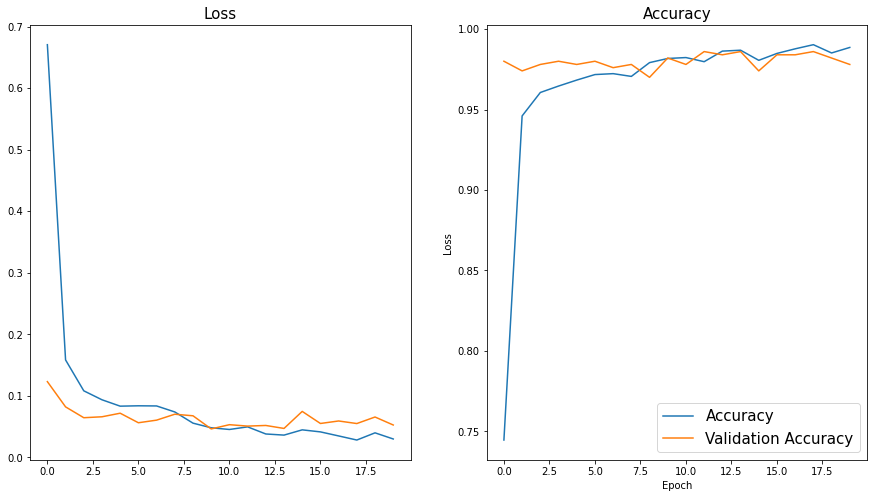

In [66]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(model2_his['loss'], label='Loss')
ax[0].plot(model2_his['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax[0].set_title('Loss', fontsize=15)

ax[1].plot(model2_his['accuracy'], label='Accuracy')
ax[1].plot(model2_his['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy', fontsize=15)

plt.legend(loc='best', fontsize=15)

We can see that both loss and accuracy learning curve showed good in the previous two graphes. 

### 4.2.3 Model evaluation and prediction

In [67]:
# Evalute model on test dataset
model2.evaluate(X_test_CNN, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 0.0519 - accuracy: 0.9830


[0.05190664902329445, 0.9829999804496765]

In [68]:
y_pred1 = model.predict(X_test_CNN)
predictied_label = np.argmax(y_pred1, axis=1)

32/32 [==============================] - 0s 4ms/step


In [69]:
report1 = classification_report(y_test, predictied_label, target_names=type_name)
print(report1)

              precision    recall  f1-score   support

     Basmati       0.99      1.00      0.99       200
     Arborio       0.97      0.94      0.95       200
   Karacadag       0.95      0.97      0.96       200
     Jasmine       0.99      0.99      0.99       200
      Ipsala       1.00      0.99      1.00       200

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



This model performs better than the basic model. But for the type **"Arborio"** rice, it needs to improve.

# 5. Model saving

In this section, we only save two models (two improved models for MLP and CNN model)

In [70]:
model_mlp1.save('model_MLP')

INFO:tensorflow:Assets written to: model_MLP/assets


In [71]:
model2.save('model_CNN')

INFO:tensorflow:Assets written to: model_CNN/assets


INFO:tensorflow:Assets written to: model_CNN/assets


# 

## <h3 align="center"> © Haozhe TANG 04.2023. All rights reserved. <h3/>